In [1]:
# SETUP CODE - PlEASE RUN THIS ONCE WHEN YOU STARTUP YOUR CODESPACE

# RUN FILE
%run 'test/week5_test.ipynb'

# Week 5 - Basic Data Analytics & Data Visualisation

## Introduction

This notebook is designed to guide you through the fundamentals of basic data analytics and visualization, covering topics such as descriptive statistics, inferential statistics, exploratory data analysis (EDA) including pandas profiling, and data visualization using Matplotlib.

By the end of this notebook, you should have a foundational understanding of:

- Descriptive statistics and their application.
- Conducting correlation tests to explore relationships between variables.
- Exploring data distributions and detecting outliers.
- Generating insightful EDA reports using `pandas-profiling`.
- Utilizing Matplotlib for data visualization.

## Import libraries needed for this notebook

In [2]:
pip install ydata_profiling


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from ydata_profiling import ProfileReport

## Statistical Analysis

### Descriptive Statistics

In this section, we'll cover basic descriptive statistics, including mean, median, mode, and measures of dispersion. Descriptive statistics help us summarize and understand the main features of a dataset.

In [5]:
# Create a DataFrame for Step 1 - Descriptive Statistics
data_descriptive = pd.DataFrame({'Values': [5, 8, 2, 7, 1, 6, 9, 2]})
print(data_descriptive, "\n")


# Calculating mean, median, mode
mean_value = data_descriptive['Values'].mean()
median_value = data_descriptive['Values'].median()
mode_value = data_descriptive['Values'].mode().iloc[0] 
#Note: if there are multiple values for mode, a dataframe of results would be returned unless .iloc[0] included

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")


   Values
0       5
1       8
2       2
3       7
4       1
5       6
6       9
7       2 

Mean: 5.0, Median: 5.5, Mode: 2


### Correlation Tests

Correlation analysis helps us understand the relationship between two variables.We'll explore correlation tests such as the Pearson correlation test and Spearman rank correlation test, using the scipy stats library. 

Important things to know about correlation coefficients:
- Pearson's correlation is appropriate for linear relationships and continuous variables.
- Spearman's correlation is suitable for monotonic relationships and ordinal or continuous variables.
- Both coefficients range from -1 to 1, indicating the strength and direction of the relationship.

Understanding these correlation coefficients is essential for choosing the appropriate method based on the nature of your data and the relationship you are investigating.

In [6]:
# Sample data
data_corr_x = pd.Series([1, 2, 3, 4, 5])
data_corr_y = pd.Series([2, 3, 4, 5, 6])

# Pearson correlation
pearson_corr, _ = stats.pearsonr(data_corr_x, data_corr_y)

# Spearman rank correlation
spearman_corr, _ = stats.spearmanr(data_corr_x, data_corr_y)

print(f"Pearson Correlation: {pearson_corr}, Spearman Correlation: {spearman_corr}")


Pearson Correlation: 1.0, Spearman Correlation: 0.9999999999999999


## Exploratory Data Analysis (EDA)

### Understanding Data Distributions

Understanding data distributions is crucial for gaining insights into the central tendencies and shapes of datasets.Let's explore descriptive statistics like mean, median, skewness, and kurtosis. 

- Skewness measures the asymmetry of a distribution. It indicates whether the data is skewed to the left (negatively skewed) or to the right (positively skewed).
  - Negative Skewness: The left tail is longer, and the distribution is stretched to the left.
  - Positive Skewness: The right tail is longer, and the distribution is stretched to the right.
  - Skewness close to 0: The distribution is approximately symmetrical.
- Kurtosis measures the tailedness or sharpness of a distribution. It indicates whether the data has heavy or light tails compared to a normal distribution.
  - Leptokurtic (Kurtosis > 3): Heavy-tailed distribution with more values in the tails than a normal distribution.
  - Mesokurtic (Kurtosis = 3): Similar tailedness to a normal distribution.
  - Platykurtic (Kurtosis < 3): Light-tailed distribution with fewer values in the tails than a normal distribution.

In [7]:
# Sample data for EDA
data_eda = pd.DataFrame({
    'Feature_A': np.random.normal(0, 1, 100),
    'Feature_B': np.random.uniform(0, 1, 100)
})
data_eda

,Feature_A,Feature_B
0,0.267050,0.868161
1,0.734453,0.245286
2,-0.283315,0.157341
3,0.122054,0.160400
4,-0.310346,0.334009
...,...,...
95,0.820482,0.153658
96,1.103714,0.453694
97,0.132566,0.530354
98,0.157362,0.017862


In [8]:
# Descriptive statistics for feature A column
mean_feature_a = data_eda['Feature_A'].mean()
median_feature_a = data_eda['Feature_A'].median()
skewness_feature_a = data_eda['Feature_A'].skew()
kurtosis_feature_a = data_eda['Feature_A'].kurt()

# Descriptive statistics for feature B column
mean_feature_b = data_eda['Feature_B'].mean()
median_feature_b = data_eda['Feature_B'].median()
skewness_feature_b = data_eda['Feature_B'].skew()
kurtosis_feature_b = data_eda['Feature_B'].kurt()

print(f"FEATURE A \nMean: {mean_feature_a} \nMedian: {median_feature_a} \nSkewness: {skewness_feature_a} \nKurtosis: {kurtosis_feature_a}")
print(f"\nFEATURE B \nMean: {mean_feature_b} \nMedian: {median_feature_b} \nSkewness: {skewness_feature_b} \nKurtosis: {kurtosis_feature_b}")

FEATURE A 
Mean: 0.09274532321835699 
Median: 0.04074335711887485 
Skewness: 0.4212691032464252 
Kurtosis: 0.17918811929445022

FEATURE B 
Mean: 0.4856825448295515 
Median: 0.46700471276928396 
Skewness: 0.018222699657206 
Kurtosis: -1.4772605935307486


## Correlation Analysis
Explore Pearson correlation and visualize correlations using seaborn heatmaps.

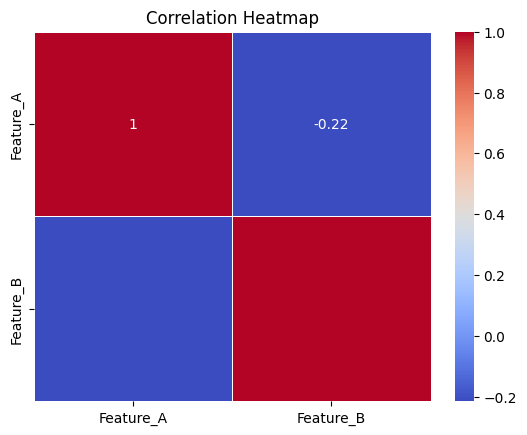

In [9]:
# Correlation matrix
corr_matrix = data_eda.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


## Outlier Detection

Outlier detection is essential for understanding anomalies that may impact statistical analyses. Identify and handle outliers using visualization techniques. 

In [10]:
# Create a dataset with outliers

# Set a random seed for reproducibility
np.random.seed(42)
# Generate a dataset with a normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=100)
# Add outliers
outliers = np.array([20, 80, 90, 110])
# Combine the normal data with outliers
data_with_outliers = np.concatenate([normal_data, outliers])

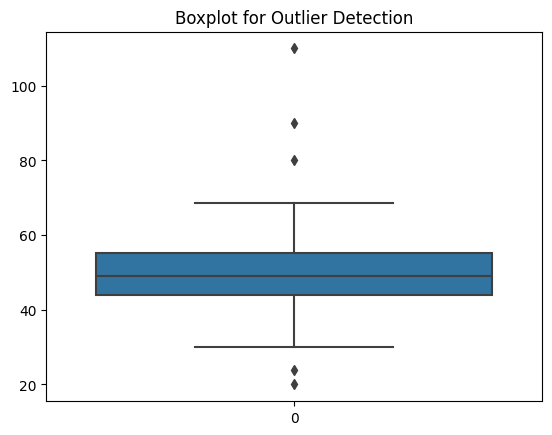

In [11]:
# Box plot for outlier detection
sns.boxplot(data=data_with_outliers)
plt.title('Boxplot for Outlier Detection')
plt.show()


### Data Distribution Exploration

Exploring data distributions helps us understand the shape and patterns within the data. Perform univariate and bivariate analysis using histograms, kernel density plots, scatter plots, and pair plots. 

/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


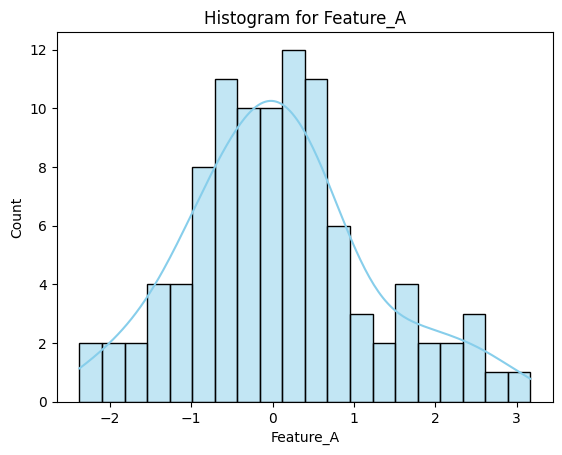

In [12]:
# Univariate analysis: Histogram
sns.histplot(data_eda['Feature_A'], kde=True, color='skyblue', bins=20)
plt.title('Histogram for Feature_A')
plt.show()


/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.python/current/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

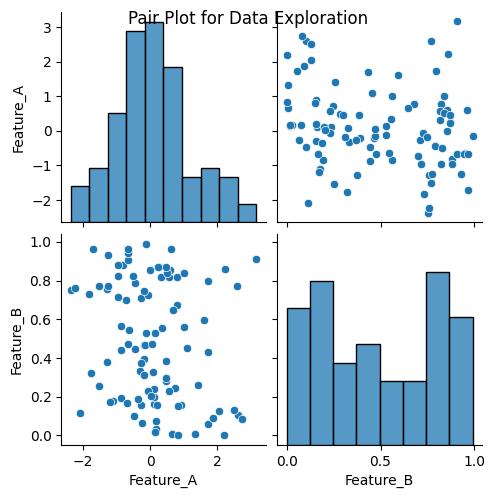

In [13]:
# Bivariate analysis: Pair plot
g = sns.pairplot(data_eda)
g.fig.suptitle("Pair Plot for Data Exploration")
plt.show()

### Pandas Profiling

pandas-profiling is a powerful library for generating profile reports from a Pandas DataFrame. It provides an overview of the dataset, including descriptive statistics, correlations, missing values, and more. It has recently had a change of library name to **ydata_profiling**

In [14]:
# Create a 100 row dataset made up of 4 numerical columns & 2 string columns

# Set a random seed for reproducibility
np.random.seed(42)
# Generate numerical columns
num_columns = {
    'Numeric1': np.random.randint(1, 100, size=100),
    'Numeric2': np.random.uniform(0, 1, size=100),
    'Numeric3': np.random.normal(50, 10, size=100),
    'Numeric4': np.random.choice([0, 1], size=100),
}
# Generate string columns
str_columns = {
    'String1': np.random.choice(['A', 'B', 'C', 'D'], size=100),
    'String2': np.random.choice(['X', 'Y', 'Z'], size=100),
}
# Create a DataFrame
df = pd.DataFrame({**num_columns, **str_columns})

# Display the first few rows of the dataset
df.head()

,Numeric1,Numeric2,Numeric3,Numeric4,String1,String2
0,52,0.280935,40.094637,1,C,Z
1,93,0.542696,44.337023,0,B,Y
2,15,0.140924,50.996514,0,B,X
3,72,0.802197,44.965243,1,B,X
4,61,0.074551,34.493366,0,A,Z


In [15]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualization with Matplotlib

### Basic Plotting

Basic plotting is fundamental for visualizing data trends and relationships. Explore basic plotting using Matplotlib for line plots, scatter plots, and bar plots. 

In [16]:
# Sample data
x_values = np.linspace(0, 10, 100)
y_values_line = np.sin(x_values)
x_values_scatter = np.random.rand(30)
y_values_scatter = np.random.rand(30)
categories = ['Category A', 'Category B', 'Category C']
values_bar = [25, 50, 30]

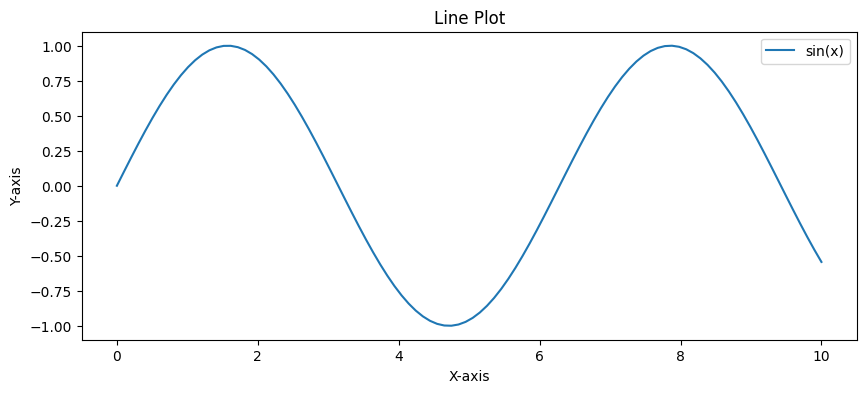

In [17]:
# Line plot
plt.figure(figsize=(10, 4))
plt.plot(x_values, y_values_line, label='sin(x)')
plt.title('Line Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

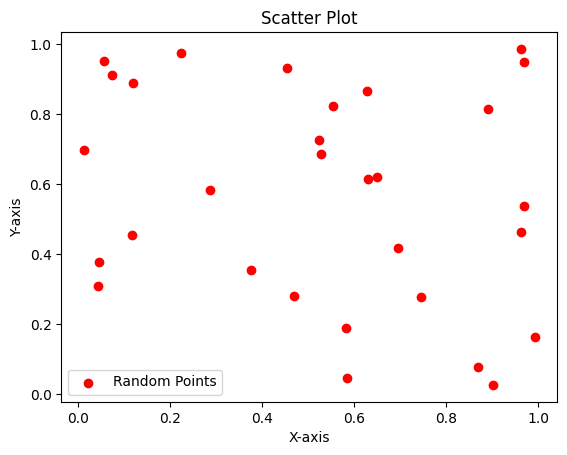

In [18]:
# Scatter plot
plt.scatter(x_values_scatter, y_values_scatter, color='red', marker='o', label='Random Points')
plt.title('Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


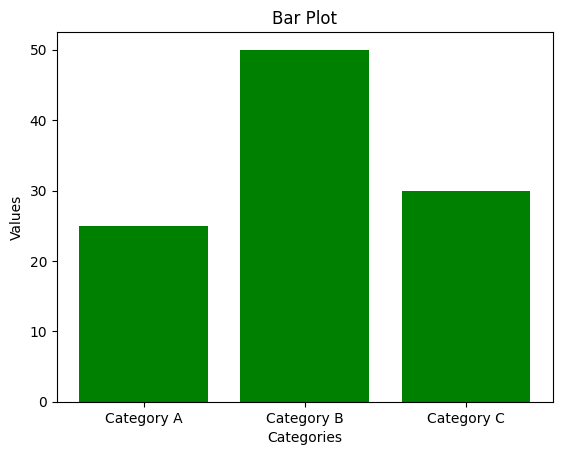

In [19]:
# Bar plot
plt.bar(categories, values_bar, color='green')
plt.title('Bar Plot')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

### Multiple Plots

Create subplots and configure figures to combine different types of plots. Multiple plots help us present various aspects of the data in a single visualization.

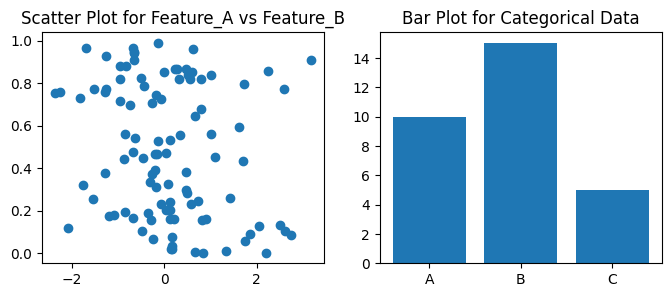

In [20]:
# Subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# Scatter plot
axes[0].scatter(data_eda['Feature_A'], data_eda['Feature_B'])
axes[0].set_title('Scatter Plot for Feature_A vs Feature_B')

# Bar plot
data_bar = pd.DataFrame({'Category': ['A', 'B', 'C'], 'Values': [10, 15, 5]})
axes[1].bar(data_bar['Category'], data_bar['Values'])
axes[1].set_title('Bar Plot for Categorical Data')

plt.show()


### Advanced Distribution Plot Types

Advanced plot types provide additional insights into the distribution and spread of the data. Explore advanced plot types like histograms, box plots, and violin plots, using matplotlib & seaborn

- Histograms: Good for understanding the overall distribution and frequency of data values.
- Box Plots: Useful for summarizing the central tendency and spread of data, as well as identifying outliers.
- Violin Plots: Provide a combination of box plot and density plot information, offering insights into distribution shape and density.

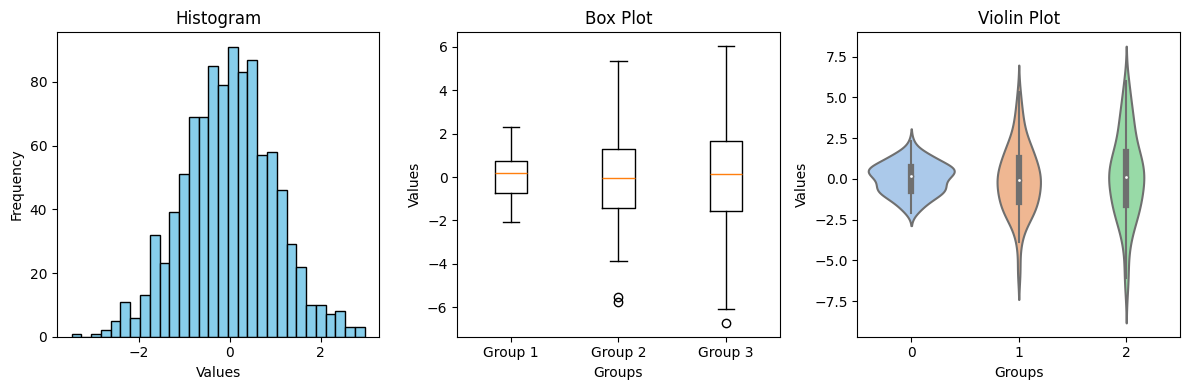

In [21]:
# Sample data
data_histogram = np.random.normal(0, 1, 1000)  # Normally distributed data
data_box_violin = [np.random.normal(0, 1, 100), np.random.normal(0, 2, 100), np.random.normal(0, 3, 100)]

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(data_histogram, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(data_box_violin, labels=['Group 1', 'Group 2', 'Group 3'])
plt.title('Box Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(data=data_box_violin, palette='pastel')
plt.title('Violin Plot')
plt.xlabel('Groups')
plt.ylabel('Values')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Spatial plotting

In [22]:
pip install geopandas


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import geopandas as gpd

In [24]:
pwd

'/workspaces/intro-to-python/week5'

In [25]:
# Create a geodataframe from a local geodatabase 
gdf = gpd.read_file("/workspaces/intro-to-python/week5/data.gdb")
gdf

,LGA_NAME,GAZETTED_DATE,PDA_NAME,AREA_HA,PDA_STATUS,EDQ_TYPE,REGULATION_CODE,SHAPE_LENG,SHAPE_Length,SHAPE_Area,geometry
0,Central Highlands,2010-07-30 00:00:00+00:00,Blackwater,656.904704,Declared,UDA,8,0.119331,0.119331,5.789632e-04,"MULTIPOLYGON (((148.88550 -23.56273, 148.88550..."
1,Moreton Bay,2016-09-02 00:00:00+00:00,The Mill at Moreton Bay,466.654910,Declared,PDA,10,0.104799,0.104799,4.256037e-04,"MULTIPOLYGON (((153.00192 -27.25602, 153.00173..."
2,Brisbane,2019-12-13 00:00:00+00:00,Roma Street Cross River Rail,32.077985,Declared,PDA,16,NaN,0.042312,2.931048e-05,"MULTIPOLYGON (((153.01846 -27.46455, 153.01848..."
3,Brisbane,2020-09-02 00:00:00+00:00,Boggo Road Cross River Rail,38.758439,Declared,PDA,18,NaN,0.030880,3.542488e-05,"MULTIPOLYGON (((153.02958 -27.49299, 153.02995..."
4,Gold Coast,2013-10-04 00:00:00+00:00,Southport,251.614934,Declared,PDA,6,NaN,0.083428,1.820525e-04,"MULTIPOLYGON (((153.41472 -27.97718, 153.41471..."
5,Sunshine Coast,2010-10-28 00:00:00+00:00,Caloundra South,2367.653670,Declared,UDA,14,NaN,0.256378,2.151302e-03,"MULTIPOLYGON (((153.10311 -26.80327, 153.09517..."
6,Sunshine Coast Regional,2023-07-28 00:00:00+00:00,Sunshine Coast Airport,454.261371,Declared,PDA,20,NaN,0.116568,4.119291e-04,"MULTIPOLYGON (((153.07885 -26.57785, 153.08066..."
7,Brisbane,2023-09-22 00:00:00+00:00,Woolloongabba,106.208138,Declared,PDA,21,0.086269,0.086365,9.705879e-05,"MULTIPOLYGON (((153.02279 -27.48250, 153.02280..."
8,Gold Coast,2013-02-01 00:00:00+00:00,Parklands,29.900810,Declared,PDA,1,0.025029,0.025029,2.744218e-05,"MULTIPOLYGON (((153.38699 -27.95798, 153.38824..."
9,Brisbane,2008-03-28 00:00:00+00:00,Bowen Hills,107.582070,Declared,UDA,2,0.064970,0.064970,9.828467e-05,"MULTIPOLYGON (((153.04039 -27.43376, 153.04051..."


In [26]:
# List all the methods of the geometry object in geopandas
dir(gdf.geometry[0])

['__and__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__xor__',
 '_geom',
 '_geom_prepared',
 '_ndim',
 '_repr_svg_',
 'almost_equals',
 'area',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'contains_properly',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'difference',
 'disjoint',
 'distance',
 'dwithin',
 'envelope',
 'equals',
 'equals_exact',
 'geom_type',
 'geometryType',
 'geoms',
 'has_z',
 'hausdorff_distance',
 'interpolate',
 'intersection',
 'intersects',
 'is_closed',
 'is_empty',
 'is_ring',
 'is_simple',
 'is_valid',
 'length',
 'line_i

In [27]:
# Inspect brisbane subset
brisbane_PDAs = (gdf[gdf["LGA_NAME"] == "Brisbane"])[['LGA_NAME','PDA_NAME', 'PDA_STATUS', 'REGULATION_CODE', 'geometry']]
brisbane_PDAs

,LGA_NAME,PDA_NAME,PDA_STATUS,REGULATION_CODE,geometry
2,Brisbane,Roma Street Cross River Rail,Declared,16,"MULTIPOLYGON (((153.01846 -27.46455, 153.01848..."
3,Brisbane,Boggo Road Cross River Rail,Declared,18,"MULTIPOLYGON (((153.02958 -27.49299, 153.02995..."
7,Brisbane,Woolloongabba,Declared,21,"MULTIPOLYGON (((153.02279 -27.48250, 153.02280..."
9,Brisbane,Bowen Hills,Declared,2,"MULTIPOLYGON (((153.04039 -27.43376, 153.04051..."
12,Brisbane,Oxley,Declared,13,"MULTIPOLYGON (((152.96685 -27.55047, 152.96690..."
14,Brisbane,Herston Quarter,Declared,11,"MULTIPOLYGON (((153.02508 -27.44697, 153.02490..."
18,Brisbane,Yeronga,Declared,14,"MULTIPOLYGON (((153.02009 -27.51558, 153.02032..."
22,Brisbane,Northshore Hamilton,Declared,1,"MULTIPOLYGON (((153.08386 -27.43445, 153.08451..."
23,Brisbane,Albert Street Cross River Rail,Declared,15,"MULTIPOLYGON (((153.02764 -27.47168, 153.02749..."
26,Brisbane,Queen's Wharf Brisbane,Declared,8,"MULTIPOLYGON (((153.02371 -27.47098, 153.02401..."


In [28]:
centroids_x = []
centroids_y = []
for _, row in brisbane_PDAs.iterrows():
    centroids_x.append(row.geometry.centroid.x)
    centroids_y.append(row.geometry.centroid.y)

global_centroid_x = sum(centroids_x)/len(centroids_x)
global_centroid_y = sum(centroids_y)/len(centroids_y)


In [29]:
global_centroid_x, global_centroid_y # y is latitude and x is longitude

(153.0274899842586, -27.466948148389495)

In [30]:
pip install folium


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import folium

# Initialise folium map object
brisbane_pda_map = folium.Map(location=[global_centroid_y, global_centroid_x], zoom_start=12)  # Set the initial map location and zoom
brisbane_pda_map

In [33]:
folium.GeoJson(brisbane_PDAs).add_to(brisbane_pda_map)
brisbane_pda_map

### Examples of other visualisations
In this section, we will share some other visulisation techniques, which have been used in EQL projects. This is just to give you an idea of how data can be used/visualised, so the code won't be shared

The below visualisation shows an "accuracy metric" for each NMI in EQX region:

<img src="visualisations/study group viz 1.png" alt="Map Visualisation" />

The below visualisation shows a layered heatmap. The back layer is a heatmap of a customers load/usage every 5 minutes in a given week. The front layer (the greyed out section), shows the responsiveness of the customer's controlled load devices

<img src="visualisations/viz 2.png" alt="Layered Heatmap Visualisation" />

The below visualisation is a hexbin plot (hexagonal binning). Hexbin plots take in X and Y values and returns what looks somewhat similar to a scatter plot, but where the entire graphing space has been divided into hexagons and all points have been grouped into their respective hexagonal regions with a color gradient indicating the density of each hexagonal area. An alternative way to think about these plots is that hexbins is a 2D histogram plot, in which the bins are hexagons and the color represents the number of data points within each bin.

<img src="visualisations/viz 3.PNG" alt="hexbin Visualisation" />

## Challenge Task

Now it's time to see how much you have learnt from this week and last week, across all the topics: data cleaning, manipulation, analysing & visualising. Below is a synthetic dataset about the electricity consumption of 200 households in the US. Using this dataset, please complete the following:
- An EDA to see what state the data is currently in. Use whatever method you would like, but briefly describe (in a markdown cell) everything you have learnt about the dataset, prior to applying any cleaning methods.
- Apply data cleaning & manipulation techniques where required
- Apply your data analytics skills to find out useful information about the cleaned dataset, as well as any relationships between the attributes. Describe your findings in a markdown cell.
- Create at least 2 visualisations using the dataset

In [34]:
# Below is the first 5 rows of the dataset you will use for the Challenge Task. Make sure you have run the first command of this notebook for this to work

challenge_df.head()


,Household_ID,Electricity_Consumption_kWh,Region,Appliance_Count,Monthly_Bill_USD,Household_Members,Has_Solar_Panels
0,1,224.835708,South,5,107.160701,1,yes
1,2,193.086785,South,3,217.925171,1,no
2,3,232.384427,North,1,204.532060,1,yes
3,4,276.151493,West,1,139.540680,1,yes
4,5,188.292331,North,8,78.389398,2,yes


In [35]:
# Complete first EDA here

Findings of first EDA in this markdown cell:


In [36]:
# Complete data cleaning / manipulation here

In [ ]:
# Complete second EDA here

Findings of second EDA in this markdown cell

In [ ]:
# Complete visualisation 1 here

In [ ]:
# Complete visualisation 2 here